# Free energy and protein folding

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

### Grouping microstates into states

The word state is overloaded and is easilyt one of the more slippery defined concepts in physics/chemistry and biology. SO let us try to be more precise:

- **A microstate** $i$: a single frozen snapshot of atomic configurations (in CM). For instance instanenotus positions and momenta of all atoms in Ar gas. 

- **A state,** $A$: a collection (fairly large) of microstates. For instance open vs colsed states of a polymer.

### Relative populations of states

Probabilities are what we observe experimentally. To develop intuition about how energies, entropies, and free energies influence the probabilities of states, let us take a generic 1D model of the energy of a system that has a parabolic shape around some stable states A and B. We will use results obtained in NVT ensemble lecture to derive ratio of probabilities fo macrostates

$$ \frac{p_A}{p_B} = \frac{\int_{V_A} e^{-\beta U(x)}}{\int_{V_B} e^{-\beta U(x)}} = \frac{Z_A}{Z_B} = \frac{e^{-\beta F_A}}{e^{-\beta F_B}}= exp(-\beta \Delta F)$$

$$Z_A = \int_{V_A} e^{-\beta U(x)} \approx \int^{+\infty}_{-\infty} e^{-\beta \big[ U^0_A+ \frac{\kappa_A}{2}(x-x_A)^2\big]} = \Big(\frac{2\pi k_B T}{\kappa_A} \Big)^{1/2} e^{-\beta U^0_A}$$

$$F_A(T) = -k_B T log Z_A = U^0_A -k_B T log \frac{1}{V}\Big(\frac{2\pi k_B T}{\kappa_A} \Big)^{1/2}$$

$$\frac{p_B}{p_A} = \Big(\frac{\kappa_A}{\kappa_B} \Big)^{1/2} e^{-\beta (U^0_B-U^0_A)}$$

/var/folders/9f/f06qc63d24q6pfxc72fx9m2w0000gp/T/ipykernel_49262/1938679140.py:5: RuntimeWarning: invalid value encountered in sqrt
  return U0 - kbT * np.log(2*np.pi*kbT/k)**0.5


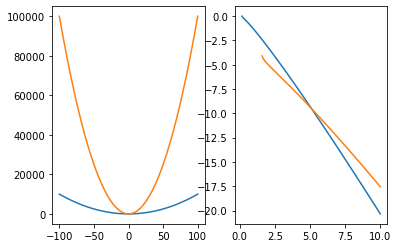

In [46]:
def E(x, k, x0=0, U0=1):
    return U0 + k*(x-x0)**2

def FE(k, kbT=1, U0=1):
    return U0 - kbT * np.log(2*np.pi*kbT/k)**0.5

x = np.linspace(-100, 100, 1000)
Ea = E(x, k=1,   x0= 0, U0=0.)
Eb = E(x, k=10,  x0= 0, U0=-4.)

kbT = np.linspace(0.1, 10, 1000)
Fa = FE(k=1,  U0=0,  kbT=kbT)
Fb = FE(k=10, U0=-4, kbT=kbT)

#fig, ax  = plt.subplots(ncols=2)
# Plot energies

# Plot free energies

### Protein folding problem with 1D potential

As crazy as it sounds we can learn something about protein folding by using a simple 1D potential:

![](./figs/folding.png)

In [4]:
def U_fold1D(ratio=1/25, deltaU=50, T=0.1):
    
    '''1D energy function, where
    rationL: fraction of folded vs unfolded states (must be less than 1)
    deltaU: energy difference between unfolded and folded states (must be positive) in units of kb = 1
    T: temperature (must be possitive)
    OUTPUT: x coordinate, U(x) potential, pf, pu" fractions of folded and funfolded states respectively. 
    '''
    assert np.any(T) > 0 
    assert ratio < 1
    assert deltaU > 0
    
    x = np.linspace(0,1,1000)
    U = np.linspace(0,1,1000)
    
    U[x < ratio] = 0
    U[x > ratio] = deltaU
    
    pf = ratio/(ratio+np.exp(-deltaU/T))
    pu = 1 - pf
    
    U[0] = U[-1] = 100 # set end states to be high
    
    return x, U, pf, pu

Text(0, 0.5, '$p(x)$')

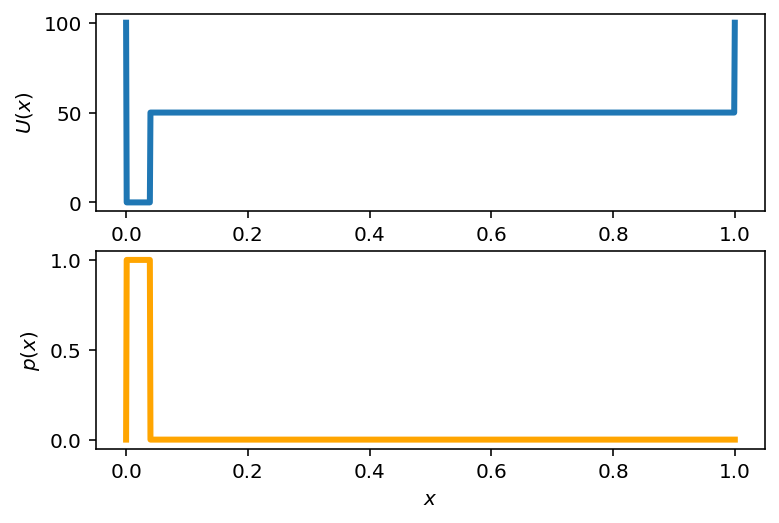

In [5]:
x, u, pf, pu = U_fold1D()

fig, ax  = plt.subplots(nrows=2)

ax[0].plot(x,u, lw =3)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$U(x)$')

ax[1].plot(x,np.exp(-u), lw=3, color='orange')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$p(x)$')

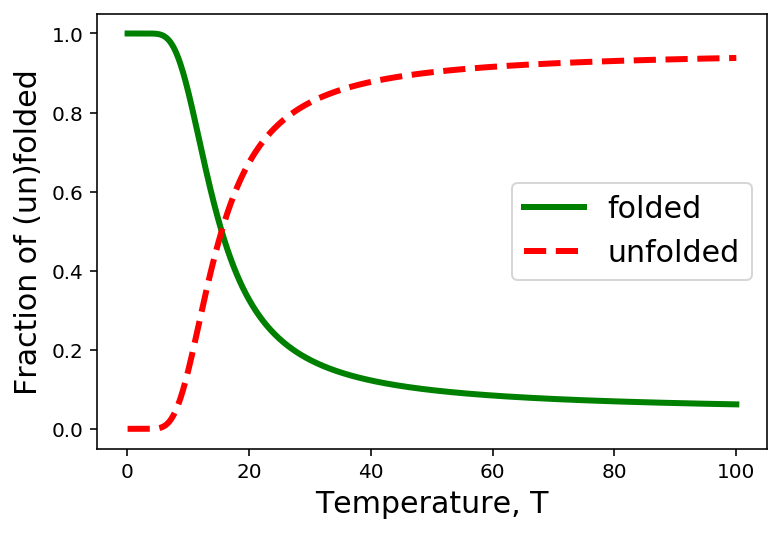

In [7]:
T = np.linspace(0.1,100,1000)
x, u, pf, pu = U_fold1D(T=T)

plt.plot(T,pf,lw=3, color='green')
plt.plot(T,pu,'--',lw=3, color='red')

plt.xlabel('Temperature, T',fontsize=15)

plt.ylabel('Fraction of (un)folded',fontsize=15)

plt.legend(['folded','unfolded'],fontsize=15)

### 1D energy profiles

Given an energy function $E(x)=Ax^4-Bx^2+C$ with constants (A=1,B=4,C=1) 

- Compute free energy difference between minima at temperature $kBT=1,10, 100$
- Compute free energy around minima of size \delta x = $0.1, 0.5 1$